In [2]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Aktuelle Pfade
file_paths = [
     "data/rad_2022_tage_19_06_23_r.csv",
#     "data/rad_2021_tage_19_06_23_r.csv",
#     "data/rad_2020_tage_19_06_23_r.csv",
#     "data/rad_2019_tage_19_06_23_r.csv",
#     "data/rad_2018_tage_19_06_23_r.csv",
#     "data/rad_2017_tage_19_06_23_r.csv",
#     "data/rad_2016_tage_19_06_23_r.csv",
#     "data/rad_2015_tage_19_06_23_r.csv",
#     "data/rad_2014_tage_19_06_23_r.csv",
#     "data/rad_2013_tage_19_06_23_r.csv",
#     "data/rad_2012_tage_19_06_23_r.csv",
#     "data/rad_2011_tage_19_06_23_r.csv",
#     "data/rad_2010_tage_19_06_23_r.csv",
#     "data/rad_2009_tage_19_06_23_r.csv",
#     "data/rad_2008_tage_19_06_23_r.csv"
]

In [32]:
# Aktuelle Pfade
file_paths = [
     "data/rad_2022_tage_19_06_23_r.csv",
     "data/rad_2021_tage_19_06_23_r.csv",
     "data/rad_2020_tage_19_06_23_r.csv",
     "data/rad_2019_tage_19_06_23_r.csv",
     "data/rad_2018_tage_19_06_23_r.csv",
     "data/rad_2017_tage_19_06_23_r.csv",
     "data/rad_2016_tage_19_06_23_r.csv",
     "data/rad_2015_tage_19_06_23_r.csv",
     "data/rad_2014_tage_19_06_23_r.csv",
     "data/rad_2013_tage_19_06_23_r.csv",
     "data/rad_2012_tage_19_06_23_r.csv",
#     "data/rad_2011_tage_19_06_23_r.csv",
#     "data/rad_2010_tage_19_06_23_r.csv",
#     "data/rad_2009_tage_19_06_23_r.csv",
#     "data/rad_2008_tage_19_06_23_r.csv"
]

In [33]:
df_list = []

for file_path in file_paths:
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

# Einzelne DataFrames zu einem Gesamt-DataFrame zusammenführen
df = pd.concat(df_list, ignore_index=True)

In [6]:
df = df.drop(columns=['uhrzeit_ende'], errors='ignore')
df = df.drop(columns=['richtung_1'], errors='ignore')
df = df.drop(columns=['richtung_2'], errors='ignore')

In [7]:
df

,datum,zaehlstelle,uhrzeit_start,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden,kommentar
0,2022-01-01,Arnulf,00:00,444.0,3.2,13.4,0.0,68,7.6,NaN
1,2022-01-02,Arnulf,00:00,476.0,1.9,15.8,0.0,80,4.7,NaN
2,2022-01-03,Arnulf,00:00,752.0,8.7,11.5,0.7,99,0.0,NaN
3,2022-01-04,Arnulf,00:00,603.0,3.7,16.5,10.3,98,1.0,NaN
4,2022-01-05,Arnulf,00:00,578.0,0.3,3.9,1.2,95,0.4,NaN
...,...,...,...,...,...,...,...,...,...,...
2185,2022-12-27,Olympia,00:00,684.0,1.2,7.0,0.0,64,5.6,NaN
2186,2022-12-28,Olympia,00:00,821.0,0.6,9.5,0.0,93,3.6,NaN
2187,2022-12-29,Olympia,00:00,880.0,5.1,13.5,1.2,98,3.4,NaN
2188,2022-12-30,Olympia,00:00,860.0,4.3,12.7,1.5,76,6.1,NaN


In [8]:
# Gruppiere den DataFrame nach 'datum' und summiere die Werte in den relevanten Spalten
df_summed = df.groupby('datum').agg({
    'gesamt': 'sum',
    'min.temp': 'mean',        # Durchschnitt der min.temp pro Tag
    'max.temp': 'mean',        # Durchschnitt der max.temp pro Tag
    'niederschlag': 'mean',
    'bewoelkung': 'mean',      # Durchschnitt der bewoelkung pro Tag
    'sonnenstunden': 'mean',
    'kommentar': 'first'       # Falls es Kommentare gibt, wird der erste genommen
}).reset_index()

# Ausgabe des resultierenden DataFrames
print(df_summed)


          datum  gesamt  min.temp  max.temp  niederschlag  bewoelkung  \
0    2022-01-01  6016.0       3.2      13.4           0.0        68.0   
1    2022-01-02  7016.0       1.9      15.8           0.0        80.0   
2    2022-01-03  7864.0       8.7      11.5           0.7        99.0   
3    2022-01-04  6563.0       3.7      16.5          10.3        98.0   
4    2022-01-05  5818.0       0.3       3.9           1.2        95.0   
..          ...     ...       ...       ...           ...         ...   
360  2022-12-27  5126.0       1.2       7.0           0.0        64.0   
361  2022-12-28  5751.0       0.6       9.5           0.0        93.0   
362  2022-12-29  6493.0       5.1      13.5           1.2        98.0   
363  2022-12-30  6268.0       4.3      12.7           1.5        76.0   
364  2022-12-31  5786.0      10.5      20.0           0.0        96.0   

     sonnenstunden kommentar  
0              7.6      None  
1              4.7      None  
2              0.0      None  

In [34]:
df_summed.describe()

,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,13144.775342,6.833973,16.265479,2.275068,68.553425,6.251507
std,5761.450723,6.636549,8.934595,4.906696,29.260680,4.825235
min,542.000000,-10.200000,-5.600000,0.000000,0.000000,0.000000
25%,8770.000000,1.200000,9.300000,0.000000,53.000000,1.500000
50%,13155.000000,7.000000,16.000000,0.000000,76.000000,6.000000
75%,17444.000000,12.500000,23.800000,2.300000,93.000000,10.700000
max,30549.000000,19.900000,36.800000,43.100000,100.000000,15.700000


In [37]:
df['gesamt'] = pd.to_numeric(df['gesamt'], errors='coerce').fillna(13144.775342)

In [38]:
# Wähle nur numerische Spalten aus
numeric_columns = df_summed.select_dtypes(include='number')

# Initialisiere den StandardScaler
scaler = StandardScaler()

# Wende den StandardScaler auf die ausgewählten numerischen Spalten an
scaled_data = scaler.fit_transform(numeric_columns)

# Erstelle ein neues DataFrame mit skalierten Werten
df_scaled = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

# Berechne die Korrelationsmatrix für die skalierten Daten
correlation_matrix_scaled = df_scaled.corr()

# Korrelationsmatrix anzeigen
correlation_matrix_scaled

,gesamt,min.temp,max.temp,niederschlag,bewoelkung,sonnenstunden
gesamt,1.000000,0.516211,0.687073,-0.150474,-0.378808,0.634907
min.temp,0.516211,1.000000,0.899100,0.211516,-0.045006,0.310297
max.temp,0.687073,0.899100,1.000000,0.096231,-0.324942,0.613784
niederschlag,-0.150474,0.211516,0.096231,1.000000,0.254980,-0.240034
bewoelkung,-0.378808,-0.045006,-0.324942,0.254980,1.000000,-0.793516
sonnenstunden,0.634907,0.310297,0.613784,-0.240034,-0.793516,1.000000


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Beispiel: X = 'min.temp', y = 'gesamt'
X = df[[ 'max.temp', 'sonnenstunden']]      ### HIER WERTE EINFÜGEN ###
y = df['gesamt']

# Aufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lineare Regression initialisieren und trainieren
model = LinearRegression()
model.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
y_pred = model.predict(X_test)

# Bewertung des Modells (Beispiel: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 5872478.450486814


In [46]:

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R²:', r2)

R²: 0.12048775366837505


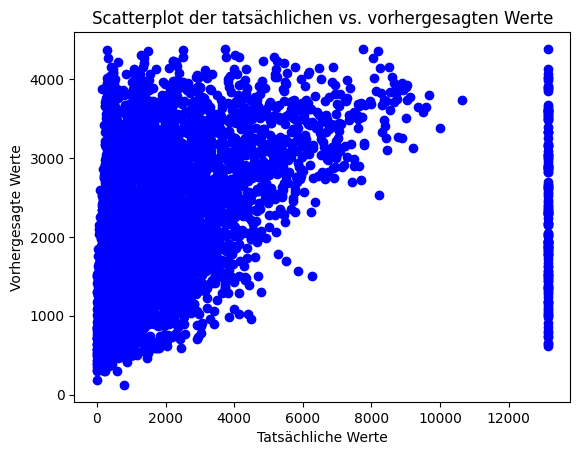

In [47]:
import matplotlib.pyplot as plt

# Scatterplot der tatsächlichen Werte
plt.scatter(y_test, y_pred, color='blue')
plt.title('Scatterplot der tatsächlichen vs. vorhergesagten Werte')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.show()


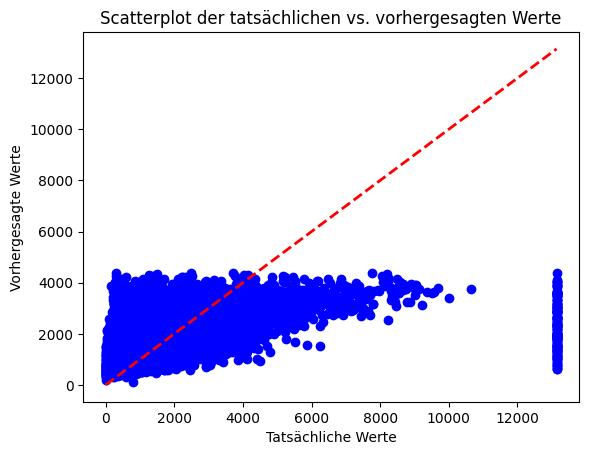

In [48]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.title('Scatterplot der tatsächlichen vs. vorhergesagten Werte')
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.show()
